(◐ω◑ ) JOHN MARK GUILLERO (◐ω◑ )

Hello My Name is JohnMark Guillero and I am 21 years old and currently taking BSIT I took BSIT cause of my parent and my other siblings and cause they see my passion and hard work when looking at different technologies and other curious things about electronics and I took BSIT to cause my brother and my sister took BSIT as well. My interest is in video games and it finds me curious as to why we find entertainment in life. videogames help us not realize that we are happy wasting our time doing what we love.

(づ ◕‿◕ )づ☞

My Hobbies are playing video games and listening to different kinds of music and watching entertaining and weird stuff on the internet. My favorite games are MOBA games like Dota2, League, and such that.

**Learned in this course:** There are many things that I have learned in this course one of them is how to use prediction in various ways such as from predicting numerical values to predicting categorical values. I learned in this course as well to value your hard work not only did I learn how to value myself I have learned as well others with how we peer review each other learning from one mistake in each activity my knowledge expands on what deep learning and machine-learned with how all is related to numbers and how there are already many ways to make your life easier with how there are already premade and automated checker of the model made it easy for me to realize that I should expand my knowledge cause there is already ways to make everything easier. I have learned a lot of things in this course I can't express my thanks to my teacher for giving me this knowledge to look outside the box and not only what is within those modules but also to be the one to change things.

**What contributions you have given towards completing the final project:**
there are many things that I have contributed to the completion of the project being one of the coders that handle the backend of the project we have device a plan to use a premade CNN model called VGG16 so that we do not need to train the model anymore that already have learned so we just freeze the weight values of that and we just made the project as just to the VGG16 and make it learn from there we also test on how accurate it was by numerous testing of the GUI and how accurate it is it made at around 80% accuracy if I'm correct we also use babysitting method cause it took a lot of time to handle a colored image cause we have an image that is almost the same as the other with how it the same color and style when in greyscale but different in the original so we use the colored and it took a lot of time if we use the automated checker of a hyperparameter such as random or grid search.

In [6]:
#KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras import utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *

#SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
# input image dimensions
img_rows, img_cols = 150, 150

#number of channels
img_channels = 1

from google.colab import drive
drive.mount('/content/gdrive')

path1 = "/content/gdrive/My Drive/NormalAndUnderNormal"     #path of folder of images
path2 = "/content/gdrive/My Drive/NormalAndUnderNormalGrey"   #path of folder to save images
print("Directory path is set")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Directory path is set


In [12]:
listing = os.listdir(path1)
num_samples=len(listing)
print ("Total number of raw images is {}".format(num_samples))

Total number of raw images is 150


In [13]:
for file in listing:
  im = Image.open(path1 + '/' + file)
  img = im.resize((img_rows, img_cols))
  gray = img.convert('L')
  gray.save(path2 + '/' + file, "JPEG")

imlist = os.listdir(path2)
print ("Raw images converted to following filenames {}".format(imlist))

Raw images converted to following filenames ['mild_012.jpg', 'mild_011.jpg', 'mild_013.jpg', 'mild_014.jpg', 'mild_015.jpg', 'mild_017.jpg', 'mild_018.jpg', 'mild_016.jpg', 'mild_019.jpg', 'mild_020.jpg', 'mild_021.jpg', 'mild_023.jpg', 'mild_024.jpg', 'mild_025.jpg', 'mild_026.jpg', 'mild_028.jpg', 'mild_001.jpg', 'mild_002.jpg', 'mild_003.jpg', 'mild_027.jpg', 'mild_029.jpg', 'mild_004.jpg', 'mild_005.jpg', 'mild_030.jpg', 'mild_032.jpg', 'mild_033.jpg', 'mild_006.jpg', 'mild_007.jpg', 'mild_008.jpg', 'mild_009.jpg', 'mild_010.jpg', 'mild_000.jpg', 'mild_034.jpg', 'mild_035.jpg', 'mild_036.jpg', 'mild_037.jpg', 'mild_039.jpg', 'mild_040.jpg', 'mild_041.jpg', 'mild_042.jpg', 'mild_044.jpg', 'mild_043.jpg', 'mild_045.jpg', 'mild_046.jpg', 'mild_047.jpg', 'mild_048.jpg', 'mild_049.jpg', 'mild_050.jpg', 'mild_031.jpg', 'mild_038.jpg', 'severe_001.jpg', 'severe_002.jpg', 'severe_003.jpg', 'severe_004.jpg', 'severe_005.jpg', 'severe_006.jpg', 'severe_007.jpg', 'severe_008.jpg', 'severe_009

In [14]:
im1 = array(Image.open(path2 + '/'+ imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

print(imnbr)
print("Total number of processed images is {}".format(imnbr))

150
Total number of processed images is 150


In [57]:
immatrix = array([array(Image.open(path2 + '/'+ im2)).flatten() for im2 in imlist],'f')

print("Matrix shape is {}".format(immatrix.shape))
print(immatrix)

label=np.ones((num_samples,),dtype = int)
label[0:50]=0 #mild
label[50:100]=1 #normal
label[100:150]=2 #severe

print("Label shape is {}".format(label.shape))
print(label)

Matrix shape is (150, 22500)
[[ 21.  21.  21. ...  80.  80.  49.]
 [ 18.  19.  20. ...  41.  40.  39.]
 [122. 125. 127. ...  12.  14.  11.]
 ...
 [103.  99.  85. ...  16.  95. 188.]
 [ 53.  47.  46. ...  68.  25.  20.]
 [ 18.  15.  17. ...  32.  31.  31.]]
Label shape is (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[array([[171., 169., 168., ..., 163., 164., 165.],
       [ 21.,  20.,  19., ..., 105., 103., 102.],
       [185., 187., 190., ..., 252., 252., 252.],
       ...,
       [142., 152., 159., ...,  49.,  50.,  50.],
       [175., 167., 169., ..., 182., 181., 180.],
       [ 51.,  45.,  44., ...,  38.,  37.,  35.]], dtype=float32), array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0])]
[array([[171., 169., 168., ..., 163., 164., 165.],
       [ 21.,  20.,  19., ..., 105., 103., 102.],
       [185., 187., 190., ..., 252., 252., 252.],
       ...,
      

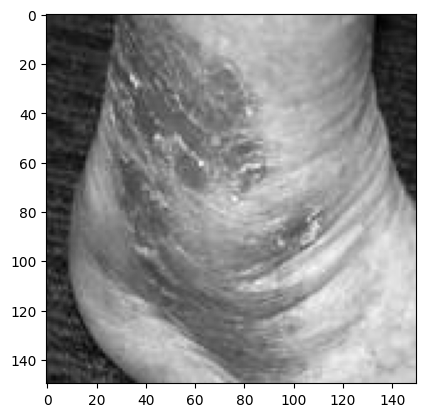

In [58]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print(train_data)
print (train_data)
print (train_data[0])
print (train_data[1])

In [66]:
(X, y) = (train_data[0], train_data[1])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


print('X_train:', X_train)
print('y_train :', y_train)
print('X_test :', X_test)
print('y_test:', y_test)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

[[171. 169. 168. ... 163. 164. 165.]
 [ 21.  20.  19. ... 105. 103. 102.]
 [185. 187. 190. ... 252. 252. 252.]
 ...
 [142. 152. 159. ...  49.  50.  50.]
 [175. 167. 169. ... 182. 181. 180.]
 [ 51.  45.  44. ...  38.  37.  35.]]
[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1 1 2 1 1 2 1 0 2 0 1 0 0 0 2 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1 0 1 0 2 1 1 0
 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0 2 0 0 1 2 1 2
 1 1 2 1 1 1 2 1 2 1 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0 2 1 0 2 1 0 0
 1 0]
X_train: [[ 69.  42.  59. ...  60.  44.  57.]
 [169. 175. 177. ... 102. 101.  99.]
 [255. 255. 255. ... 207. 208. 210.]
 ...
 [225. 225. 225. ... 200. 200. 201.]
 [ 23.  22.  22. ...  25.  11.   0.]
 [167. 164. 161. ... 160. 160. 161.]]
y_train : [1 1 2 0 2 2 1 2 0 0 0 2 2 0 2 0 1 2 0 1 2 0 1 2 1 1 1 2 2 0 0 2 2 1 1 2 2
 0 0 0 1 0 0 2 0 1 0 0 1 1 2 2 2 2 1 2 1 2 1 1 2 1 0 1 1 1 0 2 0 1 1 0 0 0
 2 1 1 1 0 2 2 1 0 0 2 0 2 2 2 1 1 1 0 0 1 0 2 2 2 2 1 0 1 2 2 1 0 0 

y_train: [1 1 2 0 2 2 1 2 0 0 0 2 2 0 2 0 1 2 0 1 2 0 1 2 1 1 1 2 2 0 0 2 2 1 1 2 2
 0 0 0 1 0 0 2 0 1 0 0 1 1 2 2 2 2 1 2 1 2 1 1 2 1 0 1 1 1 0 2 0 1 1 0 0 0
 2 1 1 1 0 2 2 1 0 0 2 0 2 2 2 1 1 1 0 0 1 0 2 2 2 2 1 0 1 2 2 1 0 0 2 2 1
 1 0 2 2 0 0 2 0 1]
y_test: [0 2 2 0 1 0 0 1 2 0 0 0 0 1 2 1 0 2 1 1 0 1 1 0 2 1 1 0 1 2]
y_train: [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0.

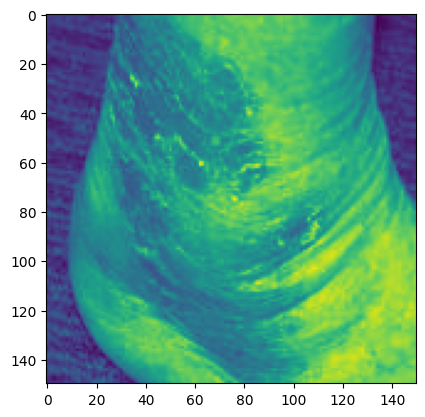

In [67]:
print("y_train:",y_train)
print("y_test:",y_test)
nb_classes = 3
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print("y_train:",Y_train)
print("y_test:",Y_test)

i = 10
img=immatrix[67].reshape(img_rows,img_cols)
plt.imshow(img)
print("label of this image is: ", Y_train[i,:])


In [68]:
#number of convolutional filters to use.
nb_filters = 30
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
#batch_size to train
batch_size = 10
# number of epochs to train
nb_epoch = 30
from tensorflow.keras.layers import BatchNormalization

# Step 10 (Modified)
model = Sequential()
model.add(Convolution2D(nb_filters, 3, 3, activation='relu', padding='valid', input_shape=(img_rows, img_cols, 1)))
model.add(Convolution2D(nb_filters, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# HOLD OUT METHOD

In [62]:
#batch_size to train
batch_size = 10
# number of epochs to train
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
12/12 [==============================] - 2s 37ms/step - loss: 1.1036 - accuracy: 0.3167 - val_loss: 1.1088 - val_accuracy: 0.2333
Epoch 2/30
12/12 [==============================] - 0s 21ms/step - loss: 1.0907 - accuracy: 0.3417 - val_loss: 1.1096 - val_accuracy: 0.2333
Epoch 3/30
12/12 [==============================] - 0s 22ms/step - loss: 1.0908 - accuracy: 0.3417 - val_loss: 1.1147 - val_accuracy: 0.2667
Epoch 4/30
12/12 [==============================] - 0s 21ms/step - loss: 1.1053 - accuracy: 0.3333 - val_loss: 1.0956 - val_accuracy: 0.3667
Epoch 5/30
12/12 [==============================] - 0s 22ms/step - loss: 1.0973 - accuracy: 0.3250 - val_loss: 1.0935 - val_accuracy: 0.4000
Epoch 6/30
12/12 [==============================] - 0s 20ms/step - loss: 1.0933 - accuracy: 0.4250 - val_loss: 1.0906 - val_accuracy: 0.4000
Epoch 7/30
12/12 [==============================] - 0s 26ms/step - loss: 1.0974 - accuracy: 0.3333 - val_loss: 1.0910 - val_accuracy: 0.4667
Epoch 8/30
12

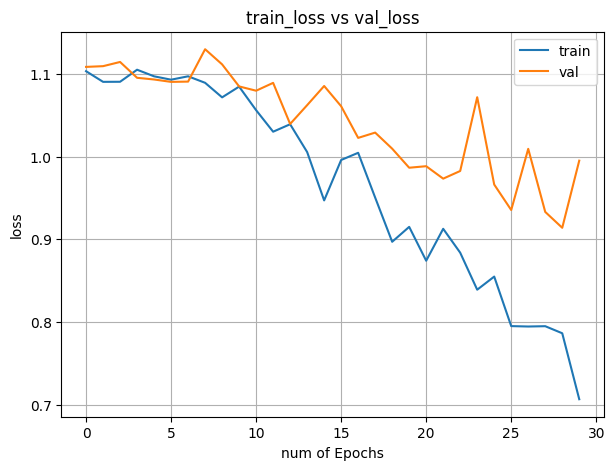

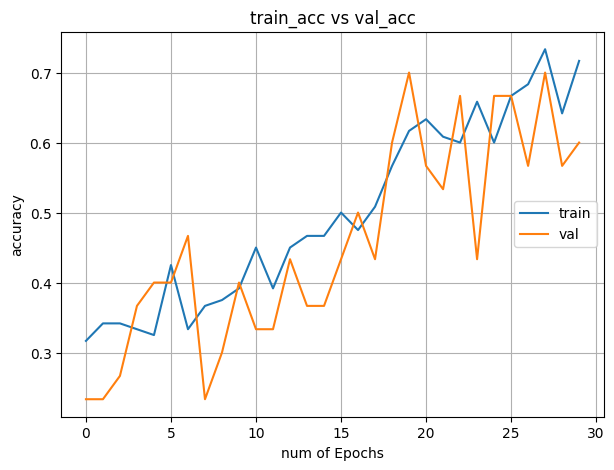

In [63]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available use bah, classic, ggplot for big pictures)
#plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train', 'val'], loc=5)
#print plt.style.available #use bah, classic, ggplot for big pictures.
#plt.style.use(['classic'])

In [64]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred= model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class 0(mild)', 'class 1(normal)', 'class 2(severe)']
print("Performance report for Hold-out method training: \n",classification_report(np.argmax(Y_test,axis=1), y_pred, target_names=target_names))
print("Confusion Matrix: \n",confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

['loss', 'accuracy']
[0.9952707290649414, 0.6000000238418579]
Test loss: 0.9952707290649414
Test accuracy: 0.6000000238418579
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 145ms/step
[[0.88208866 0.05608616 0.06182516]
 [0.16055143 0.18651685 0.65293187]
 [0.18475561 0.07826453 0.7369798 ]
 [0.06479125 0.06450084 0.8707079 ]
 [0.3071257  0.46058744 0.23228674]
 [0.8416964  0.11690779 0.04139574]
 [0.27025247 0.15051942 0.57922816]
 [0.21806982 0.2805799  0.50135016]
 [0.1653582  0.271054   0.56358784]
 [0.20427619 0.11496155 0.6807623 ]
 [0.46516246 0.46473294 0.07010459]
 [0.54372466 0.15069191 0.3055835 ]
 [0.45759442 0.25434217 0.28

For this we use the hold out method for this part as can see we have 60% accuracy with 3 classes we use the holdout method cause it is fast and reliable and for this we can observed how the plot fluctuates into an ever flowing and shows a more reliable output of 60% making it some what satisfactory even though it might not have reach it full potential it still has a chance to adjust and increase in its learning when have a increase in the epoch. Also we can notice how the plot has sudden bumps and not ever flowing but it still reached an accuracy indicating that it is learning from the data so for the hold out we use 70% and 30%. It might be different if we have use the KFOld it might decrease or increase in value.

JOHN MARK B. GUILLERO

# KFOLD

In [69]:
from sklearn.model_selection import StratifiedKFold

# Number of folds for cross-validation
num_folds = 10
# Declare an empty list to store training histories
history_list = []
# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through the folds
for fold,(train_index, val_index) in enumerate(skf.split(X, y)):
  print(f"Training on fold {fold + 1}/{num_folds}...")

# Split the data into training and validation sets
X_fold_train, X_fold_val= X[train_index], X[val_index]
y_fold_train, y_fold_val = y[train_index], y[val_index]

#Reshape the data for the CNN
X_fold_train = X_fold_train.reshape(X_fold_train.shape[0], img_rows, img_cols, 1)
X_fold_val = X_fold_val.reshape(X_fold_val.shape[0], img_rows, img_cols, 1)

model.compile(optimizer=keras.optimizers.Adadelta (learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 10

nb_classes = 3

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_fold_train, nb_classes)
y_val = utils.to_categorical(y_fold_val, nb_classes)

# Train the model on this fold
history = model.fit(X_fold_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_fold_val, y_val))
# Append the training history to the list
# You can use this history to analyze the training process, e.g., plot training curves
history_list.append(history)
#Train the final model using all the data
# print("Training the final KFold model (KFmodel) using all data...")
model.fit(X.reshape(X.shape[0], img_rows, img_cols, 1), utils.to_categorical(y, nb_classes), batch_size=batch_size, epochs=nb_epoch, verbose=0)
print("Final KFold model (KFmodel) training complete!")

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...
Epoch 1/30
14/14 [==============================] - 2s 55ms/step - loss: 17.0840 - accuracy: 0.3407 - val_loss: 16.5966 - val_accuracy: 0.3333
Epoch 2/30
14/14 [==============================] - 0s 32ms/step - loss: 16.5971 - accuracy: 0.3556 - val_loss: 16.0887 - val_accuracy: 0.3333
Epoch 3/30
14/14 [==============================] - 0s 33ms/step - loss: 18.8309 - accuracy: 0.3259 - val_loss: 15.5134 - val_accuracy: 0.3333
Epoch 4/30
14/14 [==============================] - 0s 32ms/step - loss: 16.1368 - accuracy: 0.2963 - val_loss: 14.9334 - val_accuracy: 0.3333
Epoch 5/30
14/14 [==============================] - 0s 31ms/step - loss: 15.5924 - accuracy: 0.3111 - val_loss: 14.4502 - val_accuracy: 0.3333
Epoch 6/30
14/14 [================

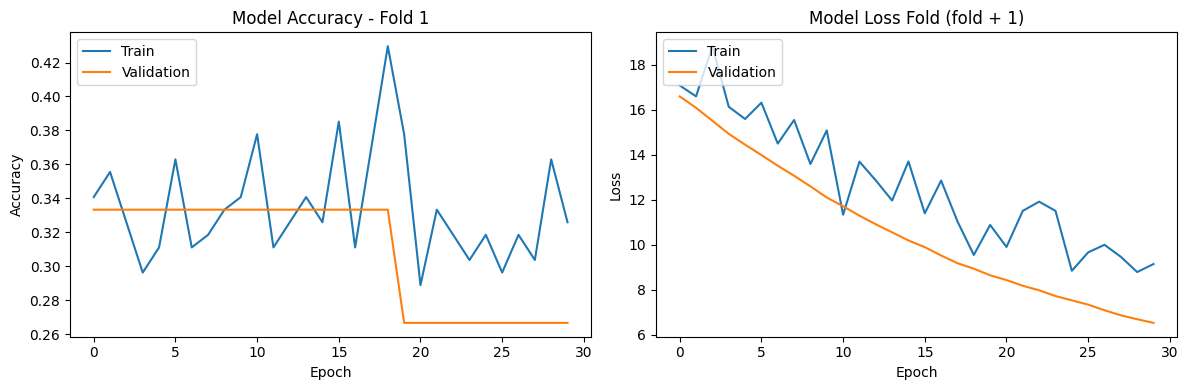



Average Training Accuracy Across Folds: {average_training_accuracy:.4f}


Final Model is Successfully Set and Compiled


In [70]:
#Initialize a list to store training accuracies for each fold
training_accuracies = []
#Plot training history for each fold
for fold, history in enumerate(history_list):
  plt.figure(figsize=(12, 4))

#Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title(f'Model Accuracy - Fold {fold + 1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Fold (fold + 1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

#Calculate and store training accuracy for this fold
training_accuracies.append(history.history['accuracy'][-1])

plt.tight_layout()
plt.show()

#Calculate and display the average training accuracy
average_training_accuracy = sum(training_accuracies) / len(training_accuracies)
print(f'\n{"="*40}\n')
print('Average Training Accuracy Across Folds: {average_training_accuracy:.4f}')
print(f'\n{"="*40}\n')
#Retrieve and average the weights
for fold, history in enumerate(history_list):
    fold_weights = model.get_weights()


#Average the weights

if fold == 0:
   average_weights = fold_weights
else:
   average_weights=[np.add(average_weights[i], fold_weights[1]) for i in range(len(average_weights))]


average_weights = [np.divide(weight, num_folds) for weight in average_weights]


#Set the weights of the final model
final_model = Sequential()
nb_filters_final = 30

final_model.add(Convolution2D(nb_filters_final, nb_conv, nb_conv, padding='valid', input_shape=(img_rows, img_cols, 1)))
#, activation='relu', data_format='channels_first'))
convout1 = Activation("relu")
final_model.add(convout1)
final_model.add(Convolution2D(nb_filters_final, nb_conv, nb_conv))
convout2 = Activation('relu')
final_model.add(convout2)
final_model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
final_model.add(Dropout (0.3))
final_model.add(Flatten())

final_model.add(Dense(10))
final_model.add(Activation('relu'))
final_model.add(Dense(25))
final_model.add(Activation('relu'))

final_model.add(Dropout (0.3))
final_model.add(Dense(nb_classes))
final_model.add(Activation('softmax'))
final_model.set_weights(average_weights)
final_model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.001), loss='categorical_crossentropy',
metrics=['accuracy'])
print("Final Model is Successfully Set and Compiled")

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

score = final_model.evaluate(X_test, Y_test, verbose=0)
print(final_model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(Y_test)
Y_pred = final_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class 0(mild)', 'class 1(normal)', 'class 2(severe)']
print("Performance report: \n", classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print("Confusion Matrix: \n", confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

['loss', 'accuracy']
[1.0986323356628418, 0.23333333432674408]
Test loss: 1.0986323356628418
Test accuracy: 0.23333333432674408
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 106ms/step
[[0.33328232 0.3333469  0.33337072]
 [0.3332823  0.33334693 0.33337077]
 [0.33328232 0.33334693 0.33337077]
 [0.33328232 0.33334693 0.33337077]
 [0.3332823  0.3333469  0.33337072]
 [0.33328232 0.3333469  0.33337072]
 [0.3332823  0.3333469  0.33337072]
 [0.33328232 0.3333469  0.33337072]
 [0.3332823  0.33334693 0.33337077]
 [0.33328232 0.33334693 0.33337077]
 [0.3332823  0.3333469  0.33337072]
 [0.3332823  0.33334693 0.33337077]
 [0.33328226 0.3333469  0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For this we have use the KFOLD but in this run we notice that it generate an innacurate prediction making it underfitting showing an flatline when we have notice in the plot making it generate in an error in the code in this data we can notice that it has not shuffled the data and use the same as testing the number 2 class making it bias and have not learned from the data.

JOHN MARK GUILLERO